In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns",None)

In [4]:
df_train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Road Map

1. Missing Value Treatment
2. Numerical Variables
    1. Distribution of numerical variables
    2. Temporal Variable
    3. Discrete Values
    4. Continuous Values
3. Categorical Variables
    1. Cardinality of categorical variables
4. Outlier Treatment
5. Relationship with target variable

# Missing Value Treatment

In [6]:
cols_with_na = [col for col in df_train.columns if df_train[col].isnull().sum() > 0]

In [7]:
for col in cols_with_na:
    print(col ,"has %" ,round(df_train[col].isnull().mean(),4))

LotFrontage has % 0.1774
Alley has % 0.9377
MasVnrType has % 0.0055
MasVnrArea has % 0.0055
BsmtQual has % 0.0253
BsmtCond has % 0.0253
BsmtExposure has % 0.026
BsmtFinType1 has % 0.0253
BsmtFinType2 has % 0.026
Electrical has % 0.0007
FireplaceQu has % 0.4726
GarageType has % 0.0555
GarageYrBlt has % 0.0555
GarageFinish has % 0.0555
GarageQual has % 0.0555
GarageCond has % 0.0555
PoolQC has % 0.9952
Fence has % 0.8075
MiscFeature has % 0.963


##### Trying to see if there is any relationship between missing values and the target variable

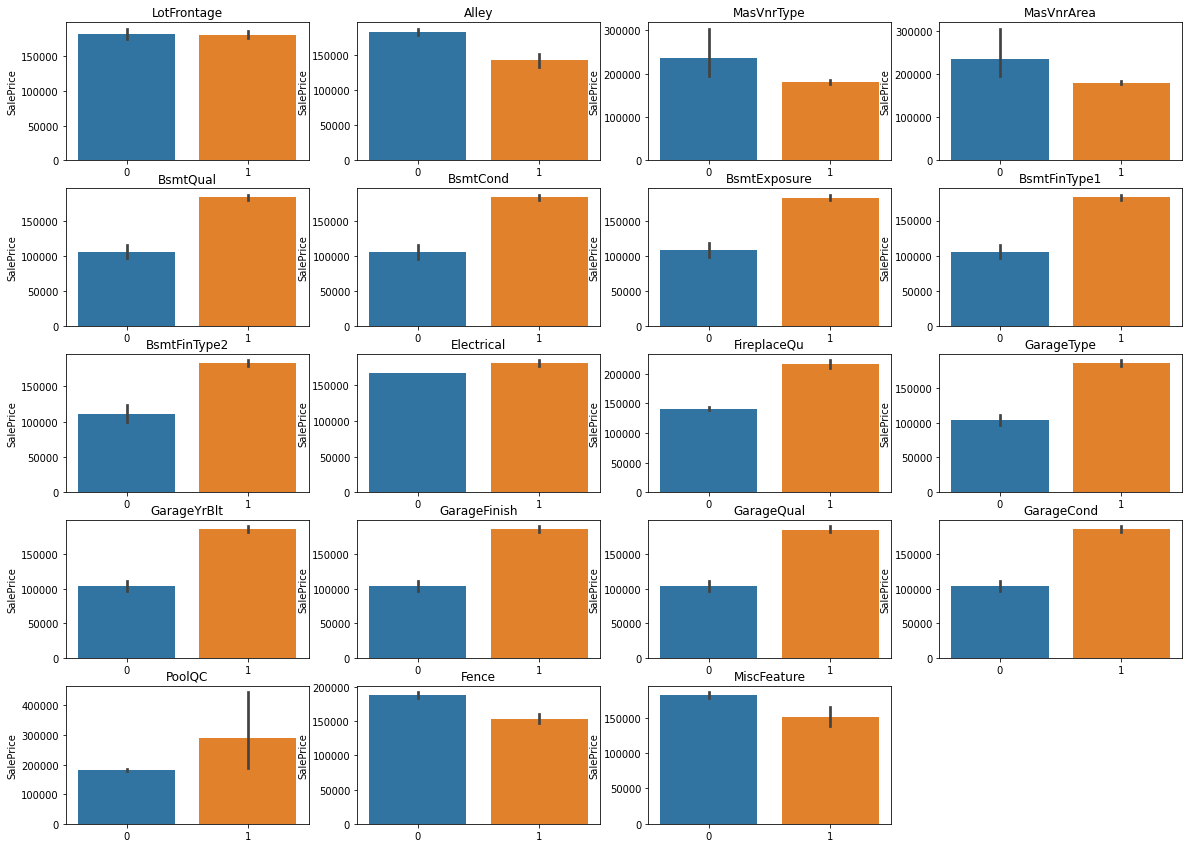

In [21]:
plt.figure(figsize=(20,30))
for i,col in enumerate(cols_with_na):
    ax= plt.subplot(10,4,i+1)
    sns.barplot(y =df_train.SalePrice,x=np.where(df_train[col].isnull(),0,1))
    ax.set_title(col)

##### Observation
Some of the columns the NA value seems to have a relationship to SaePrice since the SalePrice is higher if the Column contains NA values

# Seperating numerical columns

In [26]:
# Selecting columns that are not objects
num_cols =df_train.select_dtypes(exclude=object).columns

In [27]:
#The number of numerical columns
len(num_cols)

38

In [28]:
num_cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### Temporal columns having date time information


In [30]:
temp_cols = [col for col in num_cols if "Yr" in col or "Year" in col]
temp_cols

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

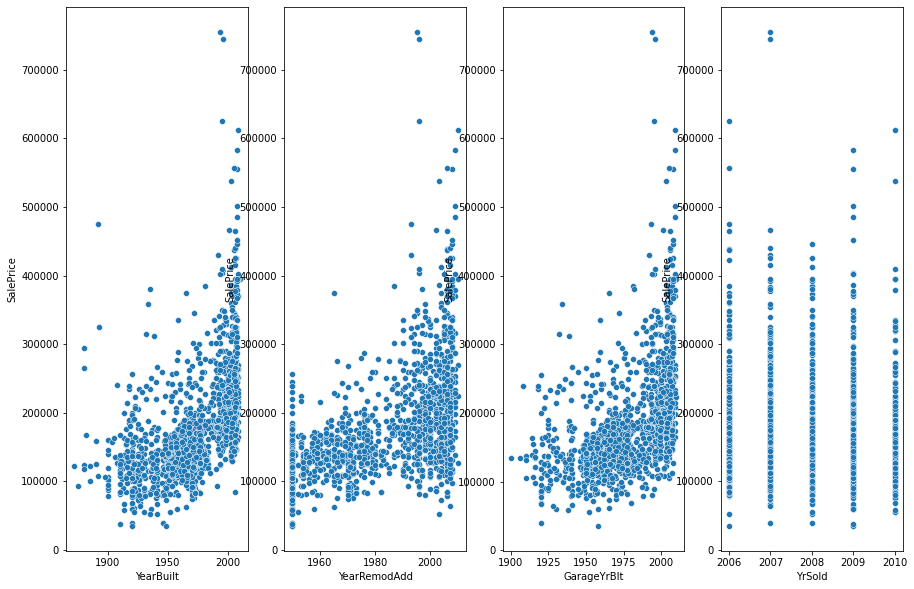

In [36]:
plt.figure(figsize=(15,10))
for i,col in enumerate(temp_cols):
    plt.subplot(1,4,i+1)
    sns.scatterplot(data = df_train, x = col,y ="SalePrice")

In [50]:
discrete_cols = [col for col in num_cols if len(df_train[col].unique()) < 25 and col not in temp_cols]
len(discrete_cols)

17

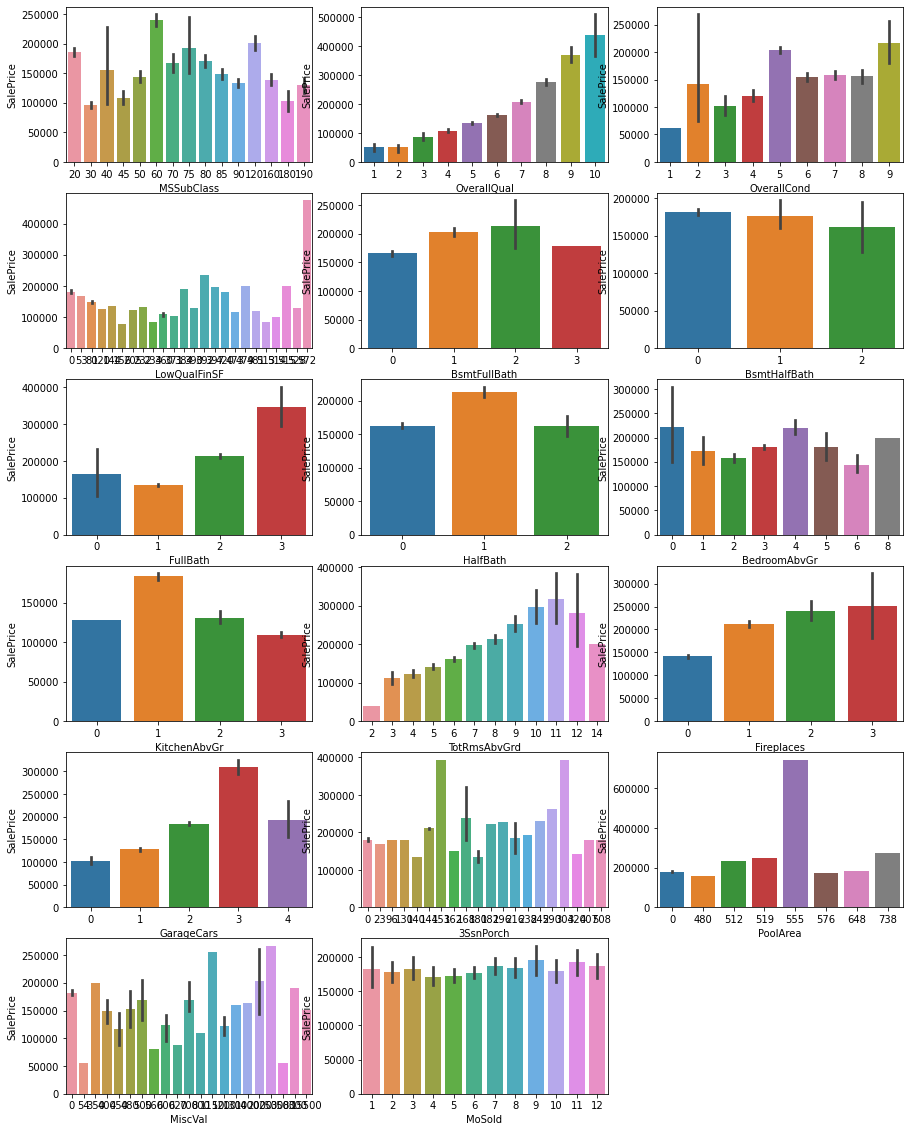

In [54]:
plt.figure(figsize=(15,20))
for i,col in enumerate(discrete_cols):
    plt.subplot(6,3,i+1)
    sns.barplot(data = df_train, x = col,y ="SalePrice")

###### Observation
Overall Quality has an exponential relation to the SalePrice. The other values seem to have a relationship that can be used to build the model. MoSod odes not have a clear relationship.

In [65]:
cont_cols = [col for col in num_cols if col not in discrete_cols and col not in temp_cols]
len(cont_cols)

17

In [66]:
#Remove ID
cont_cols.remove("Id")

# Continuous Value Columns

### Relationship with SalePrice

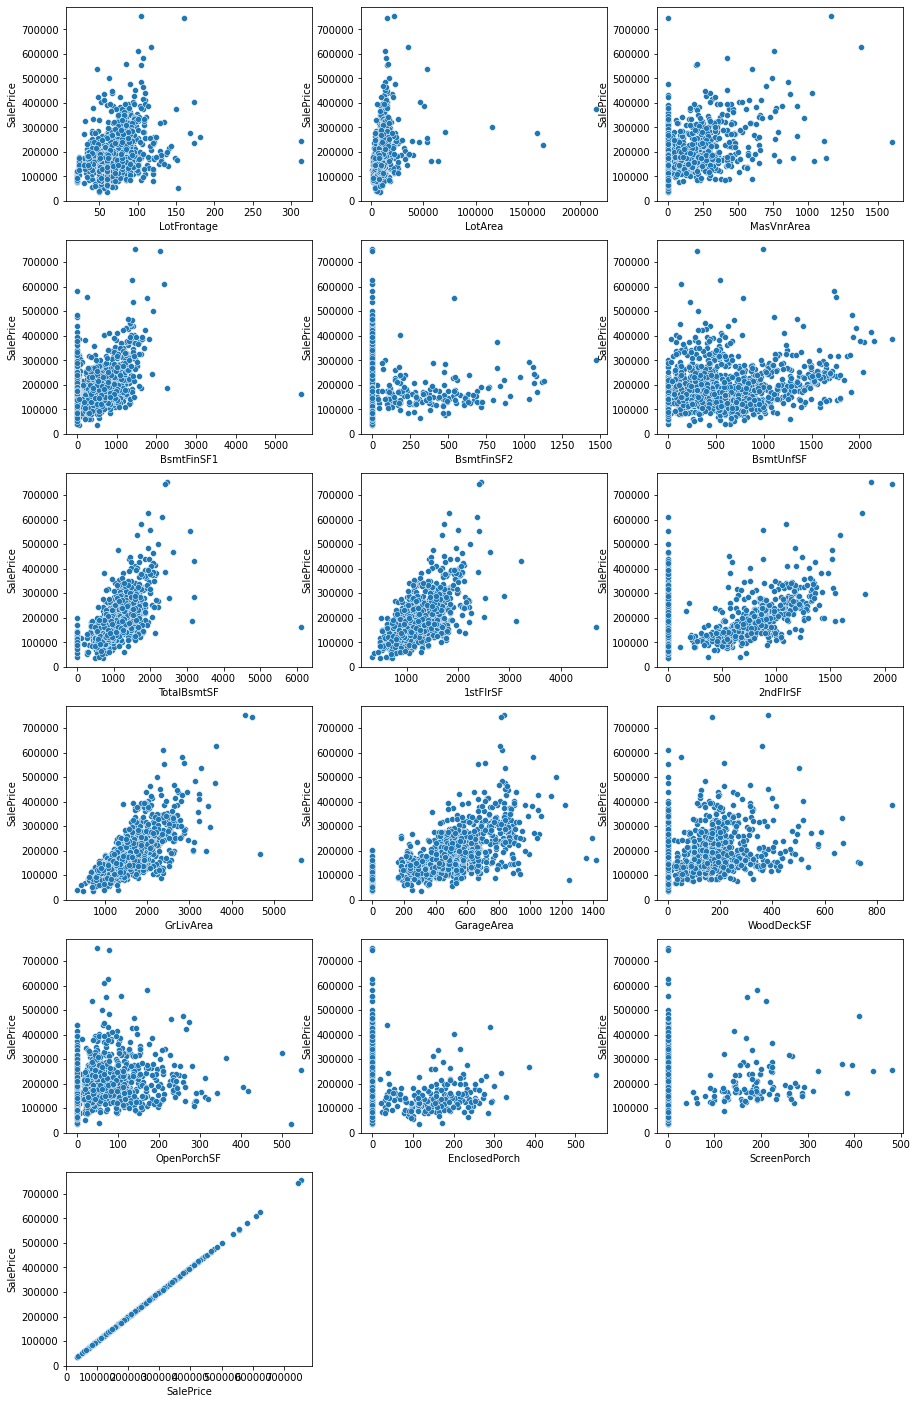

In [75]:
plt.figure(figsize=(15,25))
# plt.suptitle("Continuous Features",fontsize=15)
for i,col in enumerate(cont_cols):
    plt.subplot(6,3,i+1)
    sns.scatterplot(data = df_train, x = col, y="SalePrice")

###### Observation
The continuous features seem to have a relationship with the SalePrice but is not very evident. Feature transformation will bring out a clearrer picture . The distribution of each feature is explored below to know whic transformation is best suited. 

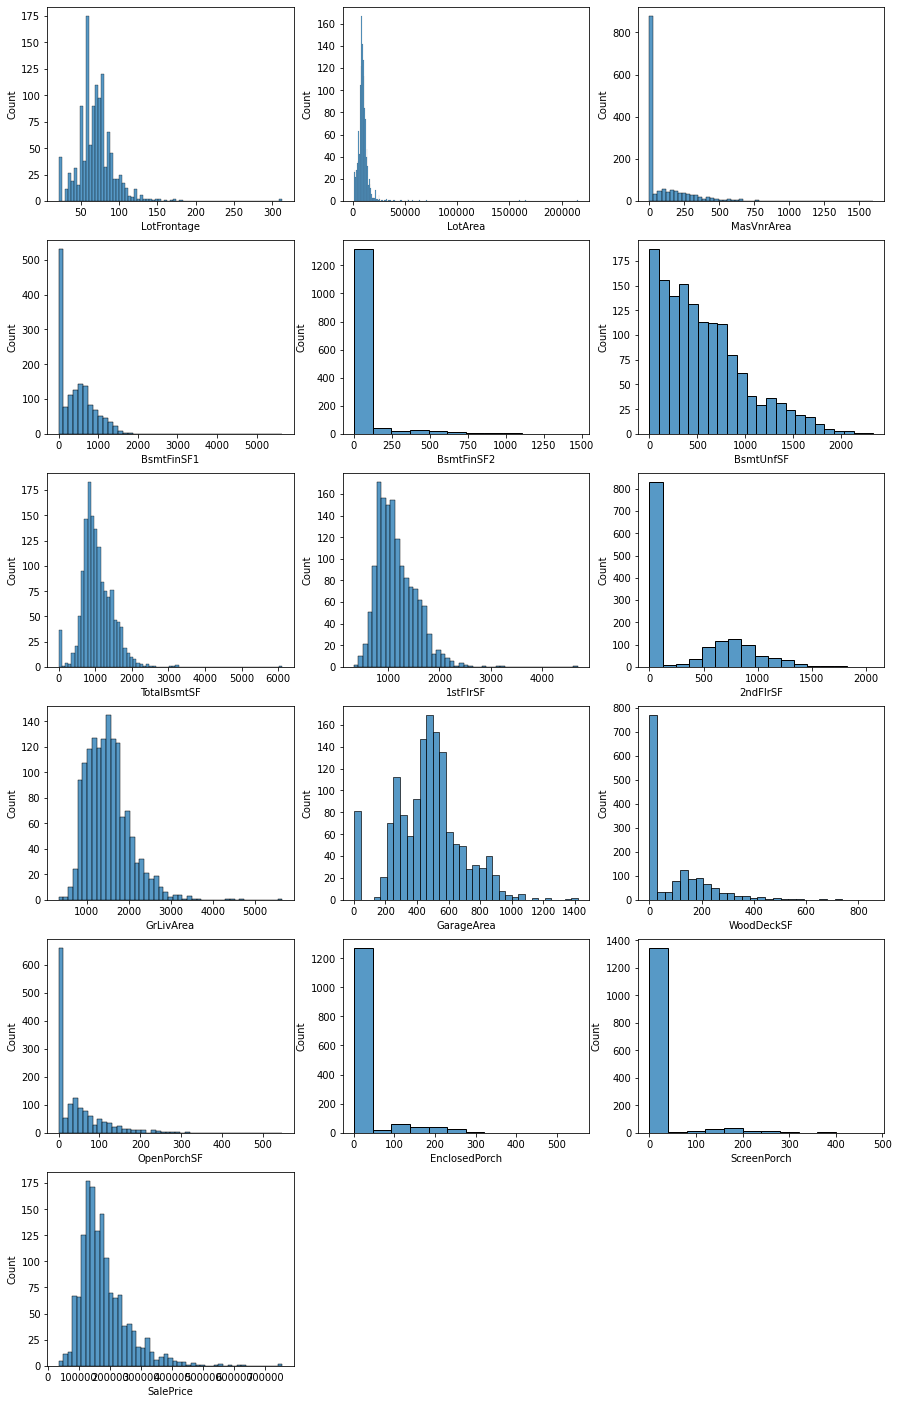

In [74]:

plt.figure(figsize=(15,25))
# plt.suptitle("Continuous Features",fontsize=15)
for i,col in enumerate(cont_cols):
    plt.subplot(6,3,i+1)
    sns.histplot(data = df_train, x = col)
    

##### Observation
SalePrice is not a gaussian distribution hence needs to be addressed in feature engineering.
There are a few outliers and few of the columns are skewed which will be dealt with in feature engineering.